<a href="https://colab.research.google.com/github/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/curve_fit_echo_train_using_phase_rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/NMR_Echo_Train_Simple_T2_Inversion_Example/nmr.csv'
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/NMR_Echo_Train_Simple_T2_Inversion_Example/NMR_log.gif'
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/NMR_Echo_Train_Simple_T2_Inversion_Example/phase_rotation.gif'
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/NMR_Echo_Train_Simple_T2_Inversion_Example/radians.gif'
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/NMR_Echo_Train_Simple_T2_Inversion_Example/results.png'
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    !pip install scipy

dyld[74169]: Library not loaded: /usr/local/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <6C399AFD-1783-33DE-B8D8-F154FD41D3AC> /usr/local/Cellar/wget/1.20.3_2/bin/wget
  Reason: tried: '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)
dyld[74170]: Library not loaded: /usr/

# NMR Echo Train processing and creation of an NMR log in Real-Time:

This Jupyter Notebook uses the existing MRIL T2 bin porosities to create an NMR log echo train with random noise that is then used to test one of our 3 SciPy metods for T2 inversion.

We are using SciPy least_squares, optimization and curve_fit libraries in Python with Tikhonov regularization, which incorporates a penalty term based on the sum of the squared parameters.

Our [repository on GitHub](https://github.com/Philliec459/NMR-Log-Echo-Train-Inversion-in-Geolog-using-Scipy-Optimization) also includes a complete Geolog project with Geolog python loglans to perform the same process as used in this notebook.

        
![NMR_log](https://github.com/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/NMR_log.gif?raw=1)


### Channel X and Y Data
In an attempt to make this more realistic, we created our own Channel X and Channel Y data from the original echo train (ydata) using our pre-defined phase rotation values in radians to calculate the X and Y data. We then again use phase rotation correction to create a phase corrected echo train for the T2 inversion similar to what we might do with the channel echo train data on a typical MRIL run well using the following code:

### Calculate a pseudo X and Y channle data bassed on the phase_angle_radian and the origial echo train ydata

#### [We are using phase angles in radians](https://en.wikipedia.org/wiki/Radian).
    
![Geolog](https://github.com/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/radians.gif?raw=1)  

Prior to T2 inversion, we typically stack the echo_train_real for better signal to noise, and then apply one of the 3 SciPy inversion techniques used in this notebook.

We also have all of this code as [Geolog python loglans with a complete Geolog project included in our GitHub repository](https://github.com/Philliec459/NMR-Log-Echo-Train-Inversion-in-Geolog-using-Scipy-Optimization).

In this project there is a Geolog layout to view the new T2 inversion results along with the original NMR log data to compare the results.

![Geolog_Image](https://github.com/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/results.png?raw=1)


---

### **The Fascinating Process of NMR Log Processing**

NMR logging is a fascinating subject (at least to me). I find it intriguing how we can go from time-domain echo trains (with noise!) and, through T2 inversion, create T2 distributions that we can partition into useful volumes: **Clay Bound Water (CBW)**, **Bound Volume Irreducible (BVI)**, and **Free Fluid Index (FFI)**.

An NMR log almost paints a picture of the reservoir. For example, the **FFI pore volume** is typically displayed in yellow, while the **BVI pore volume** is shown in dark blue. The more yellow you see, the better the rock quality, transmissibility, and storage capacity. This simple presentation says so much about the rock.

To better understand the process and test inversion methods, we created MRIL-type NMR logging echoes from eight bin porosities ranging from 4 ms to 512 ms. The following function generates the synthetic echo train:

```python
def func(x, p1, p2, p3, p4, p5, p6, p7, p8):
    return (p1 * np.exp(-x / 4) +
            p2 * np.exp(-x / 8) +
            p3 * np.exp(-x / 16) +
            p4 * np.exp(-x / 32) +
            p5 * np.exp(-x / 64) +
            p6 * np.exp(-x / 128) +
            p7 * np.exp(-x / 256) +
            p8 * np.exp(-x / 512))
```

We create an echo train with **300 echoes** and a TE of **1.2 ms**. A phase angle of **45° (π/4 radians)** is applied:

```python
# Create x array for the echo train
num_echoes = 300
TE = 1.2  # Echo spacing (ms)
xdata = np.arange(num_echoes) * TE
phase_angle = np.pi / 4  # Phase angle in radians

# Generate the echo train
y = func(xdata, P1, P2, P3, P4, P5, P6, P7, P8)
```

Next, we add random noise to the echo trains by first creating a noise train twice the length of each echo train:

```python
# Create a noise train
noise_train = np.random.normal(0, noise_level, size=num_echoes * 2)
```

We then rotate the signal to create real and imaginary components:

```python
# Rotate the signal
rotated_real = y * np.cos(phase_angle)
rotated_imag = y * np.sin(phase_angle)
```

Half of the noise is added to the **real channel**, and the other half is added to the **imaginary channel**:

```python
# Add noise to the real and imaginary channels
real_channel_with_noise = rotated_real + noise_train[:num_echoes]
imag_channel_with_noise = rotated_imag + noise_train[num_echoes:]
```

Finally, we phase-correct the noisy real and imaginary channels to recover the original signal in the real channel and isolate the noise in the imaginary channel:

```python
# Phase correction
echo_train_real = (real_channel_with_noise * np.cos(phase_angle) +
                   imag_channel_with_noise * np.sin(phase_angle))
echo_train_imag = (-real_channel_with_noise * np.sin(phase_angle) +
                   imag_channel_with_noise * np.cos(phase_angle))
```

The fun begins now! Since the noise in this example is **2 pu of random Gaussian noise**, we reduce the noise in the real echo train by **stacking** (averaging echoes across three depth levels) before performing the T2 inversion.

For the inversion, we use the Python SciPy library and apply a least-squares method:

```python
# Least-squares objective function
def objective(p, x, y, alpha):
    y_pred = func(x, *p)
    error = y - y_pred
    return np.concatenate([error, np.sqrt(alpha) * p])

result = least_squares(objective, p0, args=(xdata, ystack, alpha), bounds=([0]*8, [20]*8))
popt = result.x
```

From the optimized parameters (`popt`), the NMR porosity is calculated:

```python
# Calculate NMR Porosity
mphiarray.append(sum(popt))
```

The **BVI** and **FFI** are calculated by partitioning the T2 distribution using a T2 cutoff of **33 ms**:

```python
# Partition T2 distribution
log_33 = np.log10(33)
log_32 = np.log10(32)
log_64 = np.log10(64)

mbvi_fraction = (log_33 - log_32) / (log_64 - log_32)
mffi_fraction = 1 - mbvi_fraction

mbviarray.append(popt[0] + popt[1] + popt[2] + mbvi_fraction * popt[3])
mffiarray.append(mffi_fraction * popt[3] + popt[4] + popt[5] + popt[6] + popt[7])
```

---

### **What the Results Show**

The animated GIF accompanying this article illustrates the process. Here’s what you see:
1. **First Track**: Real (red) and imaginary (blue) echo trains with noise.
2. **Second Track**: Stacked echo train (green) with the T2 inversion fit line (red). The imaginary channel, after phase correction, is a noisy gray line.
3. **Third Track**: Least-squares T2 distribution (red) compared to the original T2 distribution (thin green line). Regularization adjustments are needed for a tighter fit.
4. **Fourth Track**: NMR log, where the stacked echoes are processed through T2 inversion, partitioning the porosity into **BVI** (blue) and **FFI** (yellow).

![T2_inversion_phase](https://github.com/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/phase_rotation.gif?raw=1)


---

### **Closing Thoughts**

NMR logging is not only a powerful tool but also a fascinating process to study and replicate. The ability to process raw echo trains, apply phase rotation, stack the data, and invert for T2 distributions opens a window into the reservoir. Whether for reservoir characterization or testing inversion methods, the steps outlined above can help practitioners understand and optimize their workflows.


Feel free to share your thoughts or questions in the comments below!

## Import Python libraries:

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  8 12:33:54 2020

@author: craig
"""
%matplotlib inline
#%matplotlib tk

#from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Read in NMR log and T2 bin data used to create the echo train in this instance:

In [4]:
#df = pd.read_csv('nmr.csv',index_col=0)
df = pd.read_csv('nmr.csv')

print(df.head())

    Depth   MPHI      P1      P2      P3      P4      P5     P6      P7  \
0  7177.0  3.294  0.7960  0.6230  0.1180  0.0130  0.0160  0.172  0.5560   
1  7177.5  3.002  0.3010  0.3500  0.2220  0.1540  0.2040  0.392  0.6140   
2  7178.0  3.289  0.0620  0.2170  0.3430  0.3800  0.4260  0.528  0.6300   
3  7178.5  4.568  0.0480  0.3030  0.6280  0.7910  0.7770  0.715  0.6670   
4  7179.0  5.397  0.1835  0.3435  0.6465  0.9735  1.0485  0.902  0.7175   

       P8   MFFI    MBVI  
0  0.9980  1.756  1.5370  
1  0.7650  2.129  0.8730  
2  0.7020  2.668  0.6220  
3  0.6390  3.590  0.9790  
4  0.5825  4.224  1.1735  


## Define the level spacing, number of levels to stack and random noise to introduce into the echo trains:

In [5]:
'''
    ---------------------------------------------------------------------------
    This is where we want to stack the data for a less noisy echotrain

    Set Level Spacing, Stacking levels and Noise below

            *** Stack_levels from 1 (no stacking) to 9 stacked levels ***
    ---------------------------------------------------------------------------
'''
level_spacing = .5    # well level spacing and this model works best on 0.5 data???
stack_levels  =  5    # odd numbers are geat, even changes level spacing in new depth offset of 0.25 '
noise_level   = 2.0   # in porosity units
'''
--------------------------------------------------------------------------------
             *** Stack_levels from 1 (no stacking) to 9 stacked levels ***
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------

                         *** Set T2 Inversion parameters ***

--------------------------------------------------------------------------------

Do you want to use SciPy Optimization or SciPy least_squares methods, both with regularization?

We suggest least squares method'''
method = []

method = 'least_squares'
#method = 'Optimize'
#method = 'Curve_fit_simple'

'''
Set the value of alpha for least_squares regularization, or lambda_ for optimization regularization
'''
#alpha   = 0.12  # least squares regularization
#alpha   = 0.3  # least squares regularization
alpha    = 0.15  # least squares regularization
lambda_  = 0.12  # Optimization regularization


## [We are using phase angles in radians](https://en.wikipedia.org/wiki/Radian)
    
![Geolog](https://github.com/Philliec459/Open-Source-Petrophysics/blob/main/NMR_Echo_Train_Simple_T2_Inversion_Example/radians.gif?raw=1)  

### Choose the phase angle that you want to use:

    phase_angle = np.pi/2 sets the variable phase_angle to the value of pi/2,
    which is approximately 1.5707963267948966 radians or 90 degrees.

    phase_angle = np.pi/4 sets the variable phase_angle to the value of pi/4,
    which is approximately 0.7853981633974483 radians or 45 degrees.

    phase_angle = np.pi/6 sets the variable phase_angle to the value of pi/6,
    which is approximately 0.5235987755982988 radians or 30 degrees.

    phase_angle = np.pi/8 sets the variable phase_angle to the value of pi/8,
    which is approximately 0.39269908169872414 radians or 22.5 degrees.



In [6]:
'''Enter the phase anlge in radians'''
# Choose a phase angle
phase_angle_rad = np.pi/6
print('phase_angle_rad =',round(phase_angle_rad, 2))
phase_angle_deg = np.rad2deg(phase_angle_rad)
print('phase_angle_deg =',round(phase_angle_deg, 2))
print()


phase_angle_rad = 0.52
phase_angle_deg = 30.0



# **Tutorial on the Phase Correction of the X and Y channels with noise**

NMR logging is a fascinating subject (at least to me). I find it intriguing how we can go from time-domain echo trains (with noise!) and, through T2 inversion, create T2 distributions that we can partition into useful volumes: **Clay Bound Water (CBW)**, **Bound Volume Irreducible (BVI)**, and **Free Fluid Index (FFI)**.

An NMR log almost paints a picture of the reservoir. For example, the **FFI pore volume** is typically displayed in yellow, while the **BVI pore volume** is shown in dark blue. The more yellow you see, the better the rock quality, transmissibility, and storage capacity. This simple presentation says so much about the rock.

To better understand the process and test inversion methods, we created MRIL-type NMR logging echoes from eight bin porosities ranging from 4 ms to 512 ms. The following function generates the synthetic echo train:

```python
def func(x, p1, p2, p3, p4, p5, p6, p7, p8):
    return (p1 * np.exp(-x / 4) +
            p2 * np.exp(-x / 8) +
            p3 * np.exp(-x / 16) +
            p4 * np.exp(-x / 32) +
            p5 * np.exp(-x / 64) +
            p6 * np.exp(-x / 128) +
            p7 * np.exp(-x / 256) +
            p8 * np.exp(-x / 512))
```

We create an echo train with **300 echoes** and a TE of **1.2 ms**. A phase angle of **30° (π/6 radians)** is applied:

```python
# Create x array for the echo train
num_echoes = 300
TE = 1.2  # Echo spacing (ms)
xdata = np.arange(num_echoes) * TE
phase_angle = np.pi / 4  # Phase angle in radians

# Generate the echo train
y = func(xdata, P1, P2, P3, P4, P5, P6, P7, P8)

```

We then rotate the signal to create real and imaginary components:

```python
# Rotate the signal
rotated_real = y * np.cos(phase_angle)
rotated_imag = y * np.sin(phase_angle)
```


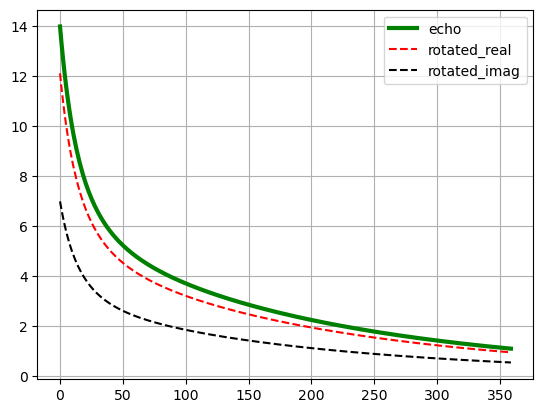

In [2]:
import numpy as np
import matplotlib.pyplot as plt



def func(x, p1, p2, p3, p4, p5, p6, p7, p8):
    return (p1 * np.exp(-x / 4) +
            p2 * np.exp(-x / 8) +
            p3 * np.exp(-x / 16) +
            p4 * np.exp(-x / 32) +
            p5 * np.exp(-x / 64) +
            p6 * np.exp(-x / 128) +
            p7 * np.exp(-x / 256) +
            p8 * np.exp(-x / 512))

p1, p2, p3, p4, p5, p6, p7, p8 = 0,2,4,2,0,2,4,0

num_echoes = 300
TE = 1.2  # echo spacing (ms)
x = np.arange(num_echoes) * TE
phase_angle = np.pi / 6  # Phase angle in radians


echo = func(x, p1, p2, p3, p4, p5, p6, p7, p8)

plt.plot(x,echo,'g-',linewidth = 3,label='echo')


# Step 3: Rotate the signal to create real and imaginary components
rotated_real = echo * np.cos(phase_angle)
rotated_imag = echo * np.sin(phase_angle)

plt.plot(x,rotated_real,'r--',label='rotated_real')
plt.plot(x,rotated_imag,'k--',label='rotated_imag')
plt.legend()

plt.grid()



### Suggestion from Dr. Ridvan Akkurt:

In our first attempt to create X and Y channel echo trains with noise, Dr. Akkurt suggested that we create an noise echo train twice as long as our echo train and then distribute that noise to the X and Y channel data. It is emberrasing to see what I came up with, until I saw this simple example of **slicing data**. We used this method to distribute our noise data, and we were able to proceed with Dr. Akkurt's great suggestion. 

In [3]:
a = [1,2,3,4,5,6]
print('our array:', a)
print('a[:3] =', a[:3])
print('a[3:] =', a[3:])

our array: [1, 2, 3, 4, 5, 6]
a[:3] = [1, 2, 3]
a[3:] = [4, 5, 6]


### Create Noise Train twice as long as echo

Next, we add random noise to the echo trains by first creating a noise train twice the length of each echo train:

```python
# Create a noise train
noise_train = np.random.normal(0, noise_level, size=num_echoes * 2)
```

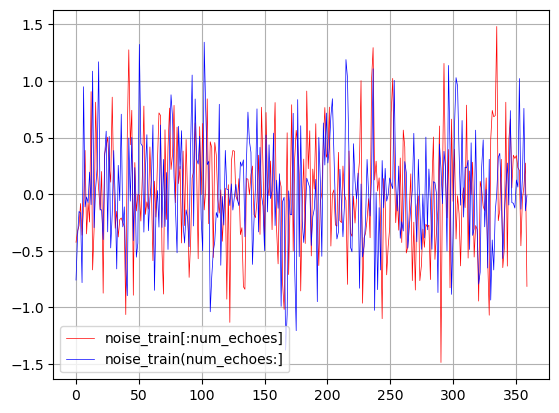

In [4]:
noise_level = .5

# Step 2: Create a noise train
noise_train = np.random.normal(0, noise_level, size=num_echoes * 2)


plt.plot(x,noise_train[:num_echoes],'r-',linewidth = .5,label='noise_train[:num_echoes]')
plt.plot(x,noise_train[num_echoes:],'b-',linewidth = .5,label='noise_train(num_echoes:]')
plt.legend()
plt.grid()

### Add Noise to rotated_real and rotated_imag

Half of the noise is added to the **real channel**, and the other half is added to the **imaginary channel**:

```python
# Add noise to the real and imaginary channels
real_channel_with_noise = rotated_real + noise_train[:num_echoes]
imag_channel_with_noise = rotated_imag + noise_train[num_echoes:]
```


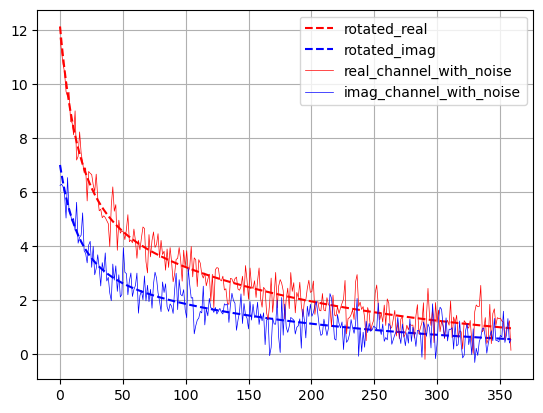

In [5]:
# Step 4: Add noise to the real and imaginary channels
real_channel_with_noise = rotated_real + noise_train[:num_echoes]
imag_channel_with_noise = rotated_imag + noise_train[num_echoes:]

plt.plot(x,rotated_real,'r--',label='rotated_real')
plt.plot(x,rotated_imag,'b--',label='rotated_imag')
plt.plot(x,real_channel_with_noise,'r-',linewidth = .5,label='real_channel_with_noise')
plt.plot(x,imag_channel_with_noise,'b-',linewidth = .5, label='imag_channel_with_noise')
plt.grid()
plt.legend()

### Rotate the noisy channels back to isolate the original signal

Finally, we phase-correct the noisy real and imaginary channels to recover the original signal in the real channel and isolate the noise in the imaginary channel:

```python
# Phase correction
echo_train_real = (real_channel_with_noise * np.cos(phase_angle) +
                   imag_channel_with_noise * np.sin(phase_angle))
echo_train_imag = (-real_channel_with_noise * np.sin(phase_angle) +
                   imag_channel_with_noise * np.cos(phase_angle))
```


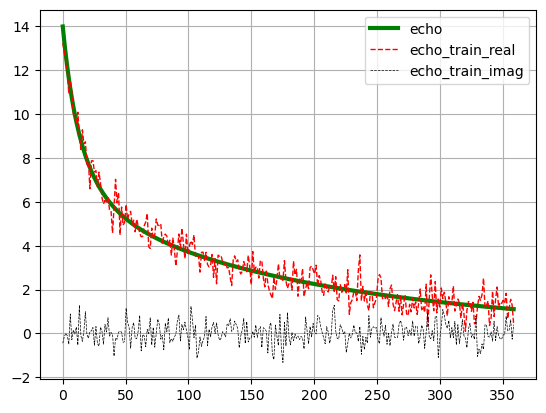

In [6]:
# Step 5: Rotate the noisy channels back to isolate the original signal
echo_train_real = (real_channel_with_noise * np.cos(phase_angle) +
                  imag_channel_with_noise * np.sin(phase_angle))
echo_train_imag = (-real_channel_with_noise * np.sin(phase_angle) +
                   imag_channel_with_noise * np.cos(phase_angle))



plt.plot(x,echo,'g-',linewidth = 3,label='echo')
plt.plot(x,echo_train_real,'r--',linewidth = 1,label='echo_train_real')
plt.plot(x,echo_train_imag,'k--',linewidth = .5,label='echo_train_imag')
plt.grid()
plt.legend()

### T2 Inversion

The fun begins now! Since the noise in this example is **2 pu of random Gaussian noise**, we reduce the noise in the real echo train by **stacking** (averaging echoes across three depth levels) before performing the T2 inversion.

For the inversion, we use the Python SciPy library and apply a least-squares method:

```python
# Least-squares objective function
def objective(p, x, y, alpha):
    y_pred = func(x, *p)
    error = y - y_pred
    return np.concatenate([error, np.sqrt(alpha) * p])

result = least_squares(objective, p0, args=(xdata, ystack, alpha), bounds=([0]*8, [20]*8))
popt = result.x
```


In [37]:
from scipy.optimize import least_squares

alpha = 0.1

# Set the initial parameter values
p0 = np.ones(8)

# least_squares objective function to be minimized, including a regularization term
def objective(p, x, y, alpha):
    y_pred = func(x, *p)
    error = y - y_pred
    return np.concatenate([error, np.sqrt(alpha) * p])



result = least_squares(objective, p0, args=(x, echo_train_real, alpha), bounds=([0]*8, [20]*8))
popt = result.x

print('alpha:  ',alpha)
print('Bins:     ', 1, '  ',2, ' ',3,'  ', 4,'  ', 5, '  ',6, '  ',7, '  ',8)
print('True T2:  ', p1, '  ',p2, ' ',p3,'  ', p4,'  ', p5, '  ',p6, '  ',p7, '  ',p8)
print('Estim T2:',round(popt[0],2), round(popt[1],2),round(popt[2],2),round(popt[3],2),round(popt[4],2),round(popt[5],2), round(popt[6],2),round(popt[7],2)  )



alpha:   0.1
Bins:      1    2   3    4    5    6    7    8
True T2:   0    2   4    2    0    2    4    0
Estim T2: 0.0 1.82 3.25 1.53 1.13 2.57 2.39 0.79


---
---
# **Create Echo Trains and then use SciPy least_squares or Optimization with regularization for the T2 inversion:**

For SciPy least_squares Alpha=0 has no optimization

The parameter **lambda_** in SciPy Optimization determines the strength of the regularization with this method.
You can adjust the value of lambda_ to find a good balance between fitting the data and preventing overfitting.


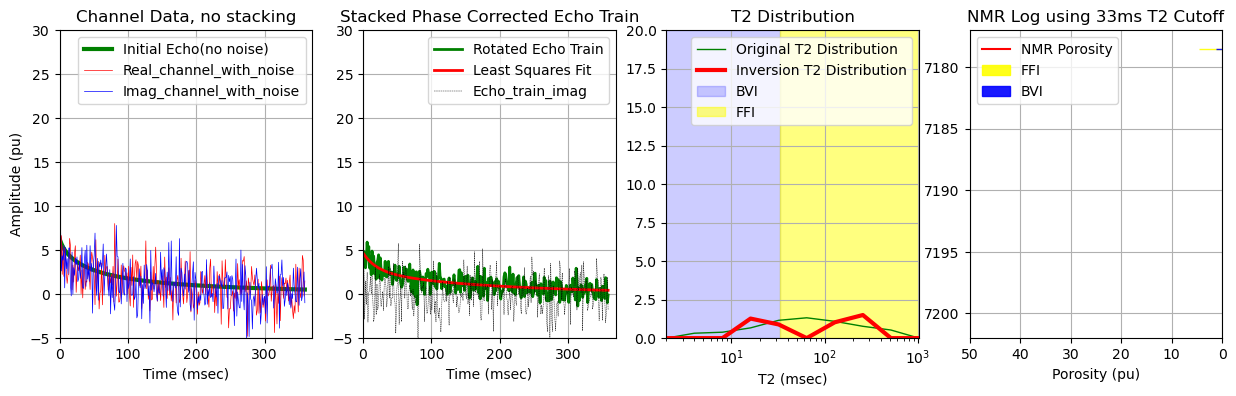

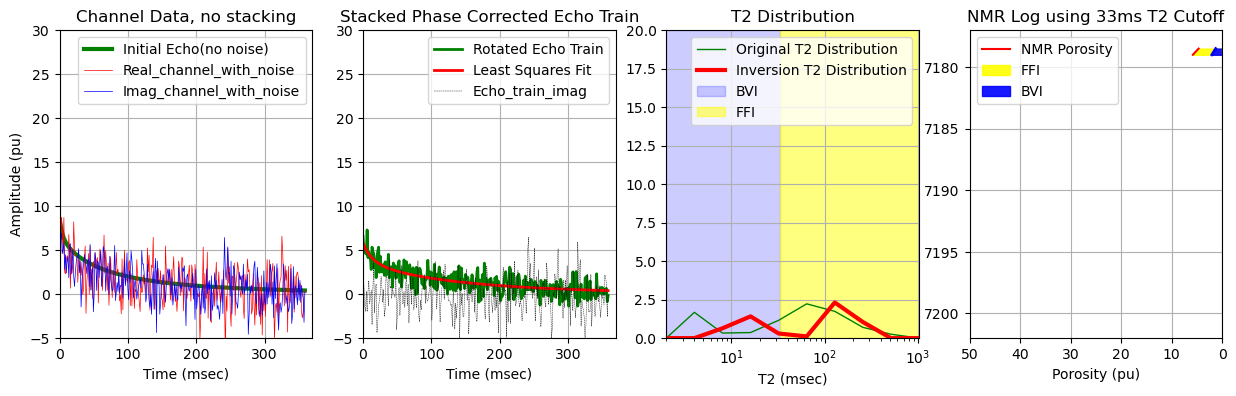

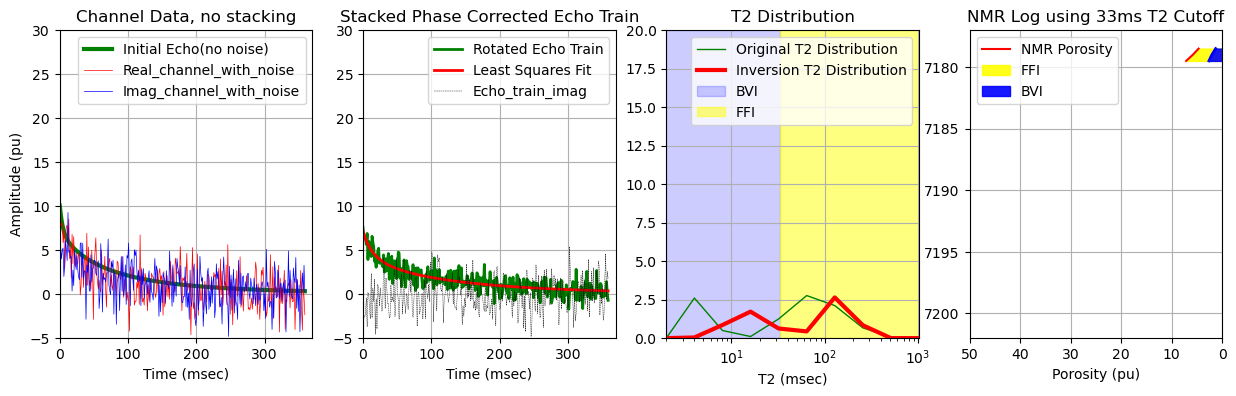

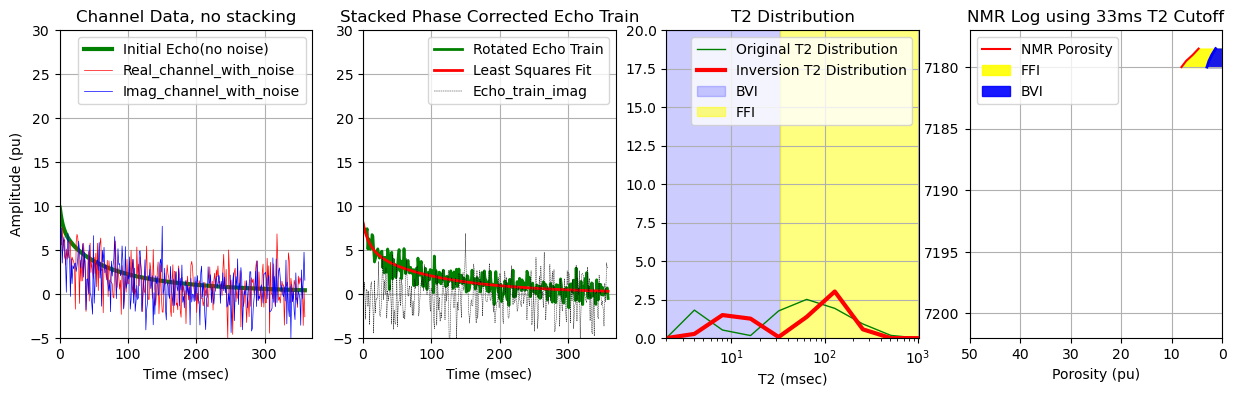

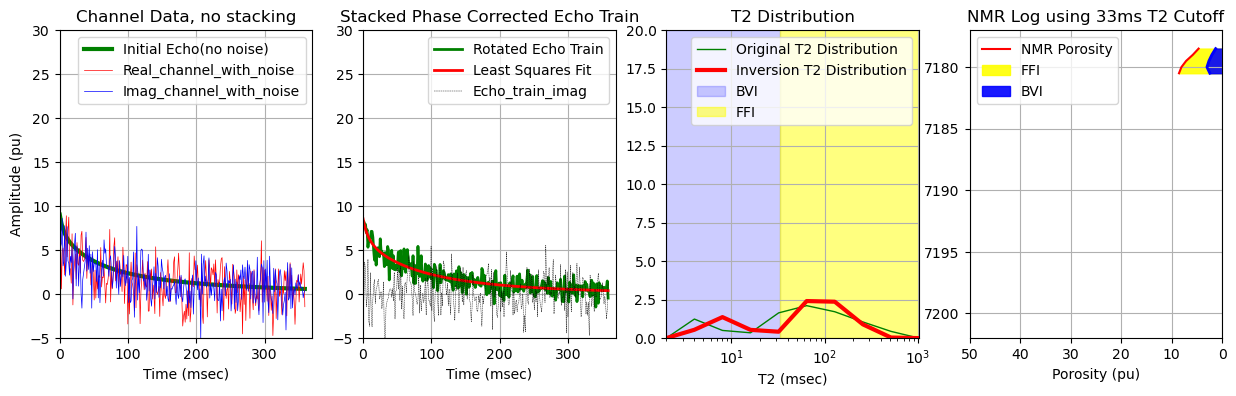

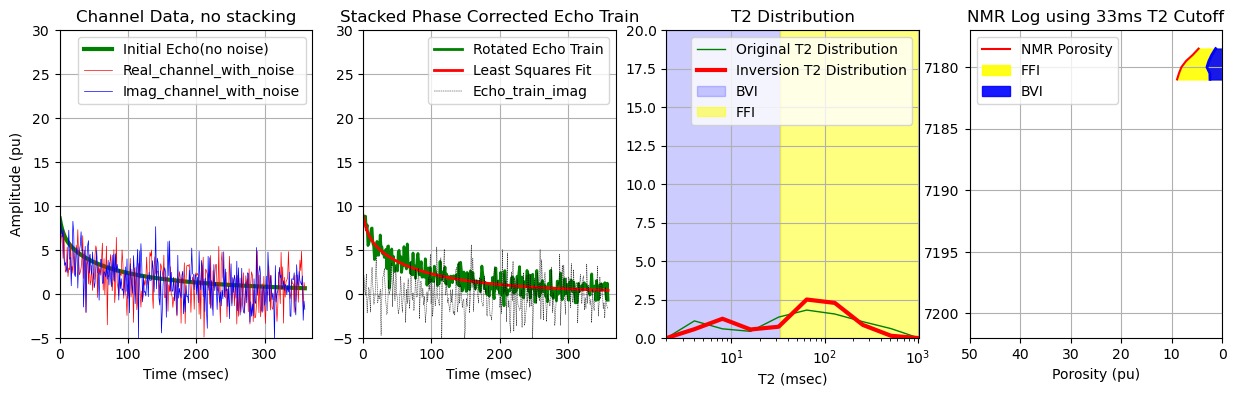

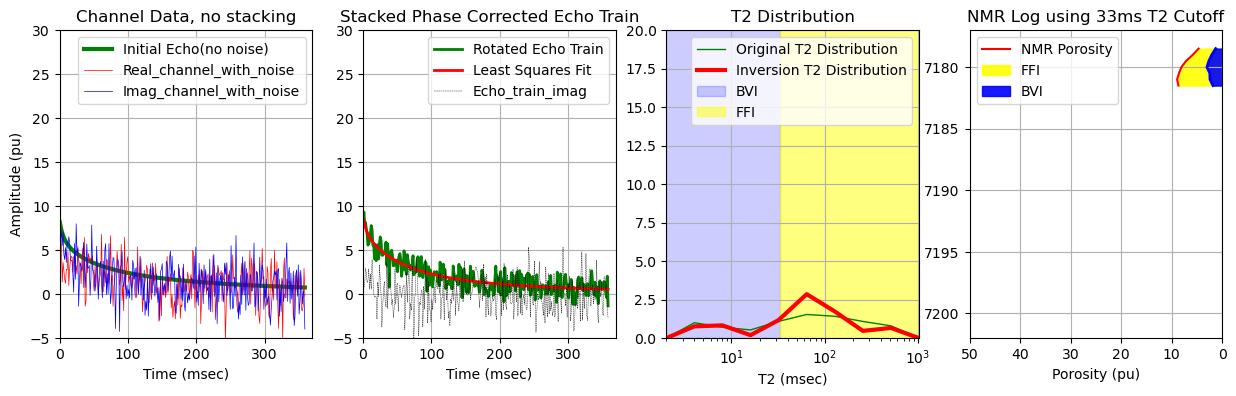

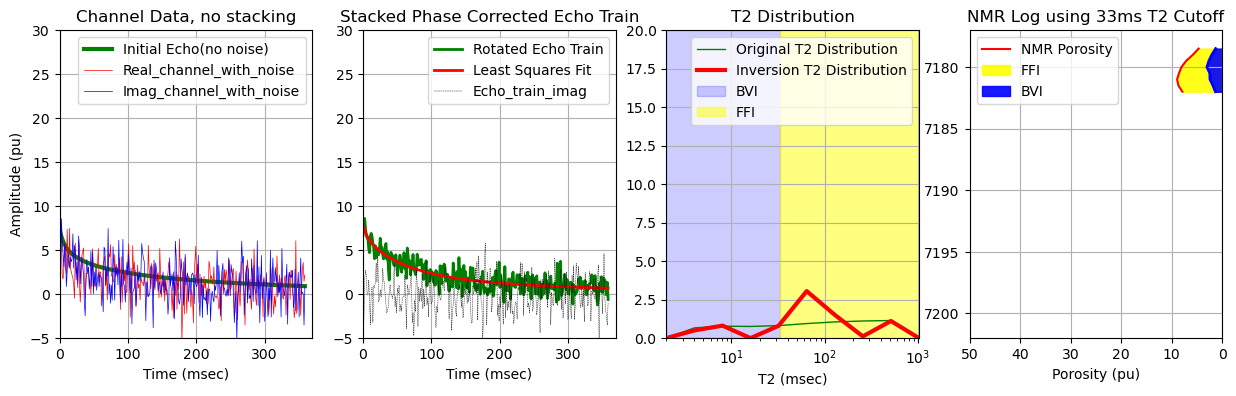

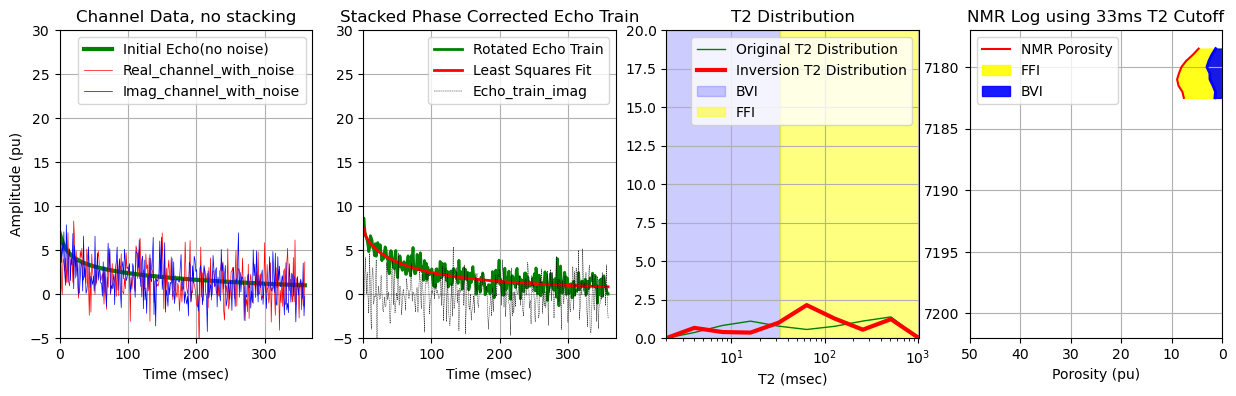

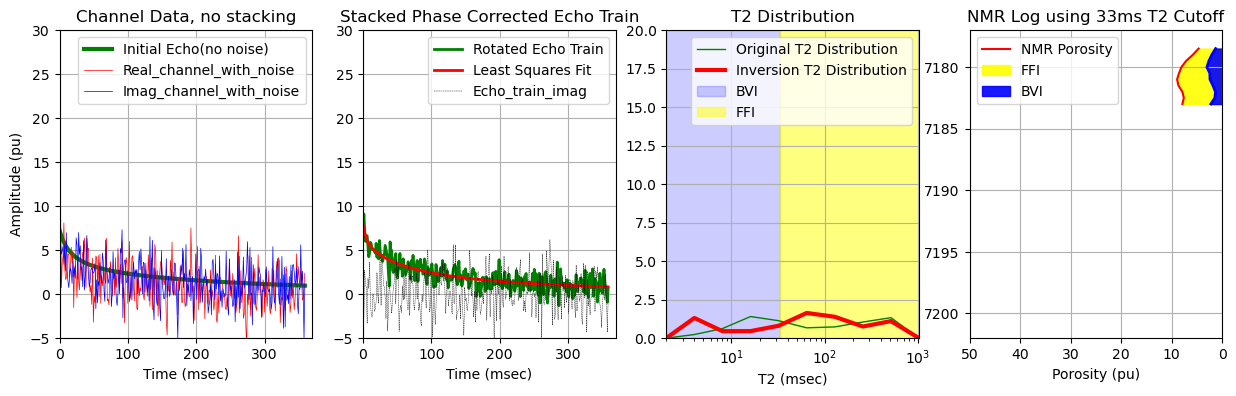

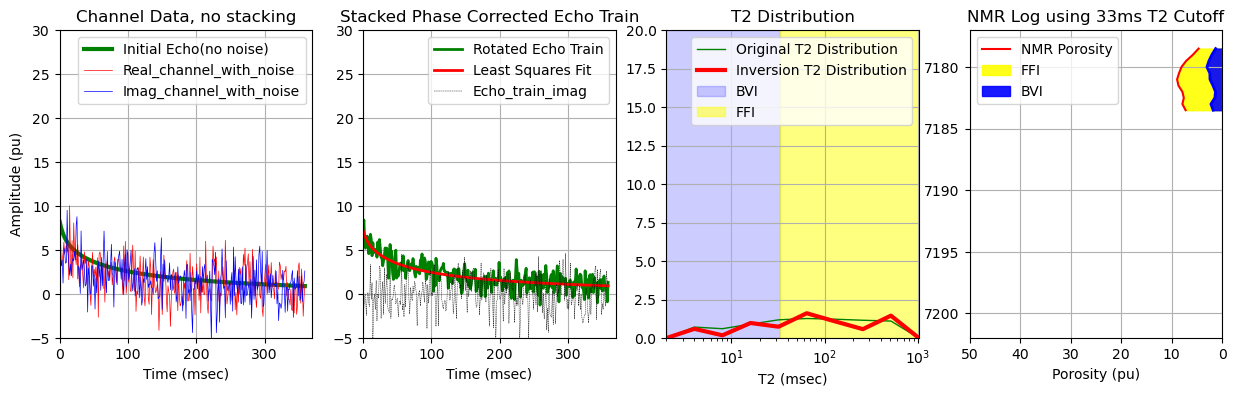

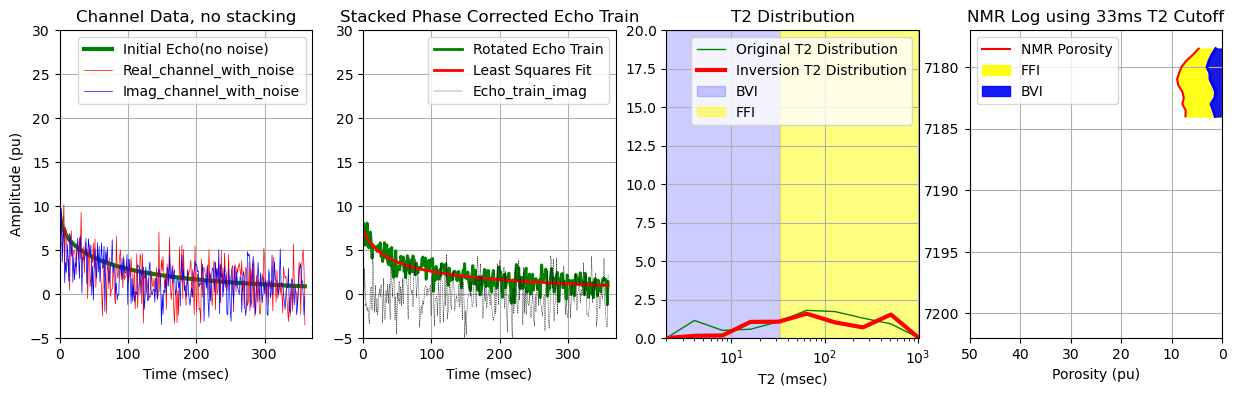

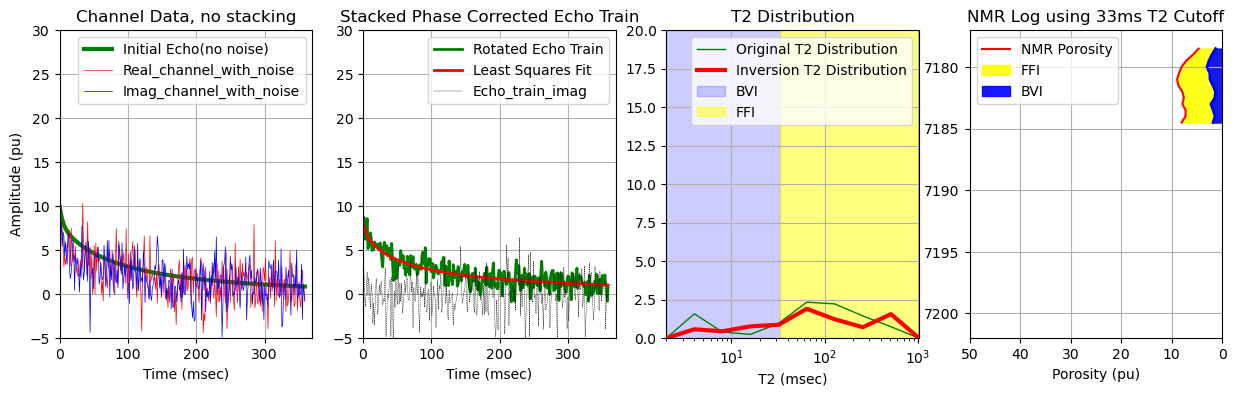

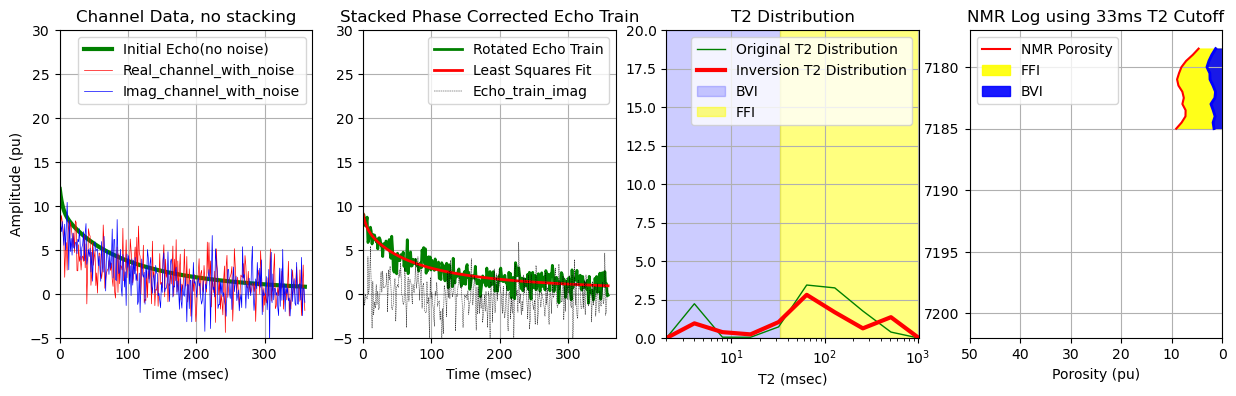

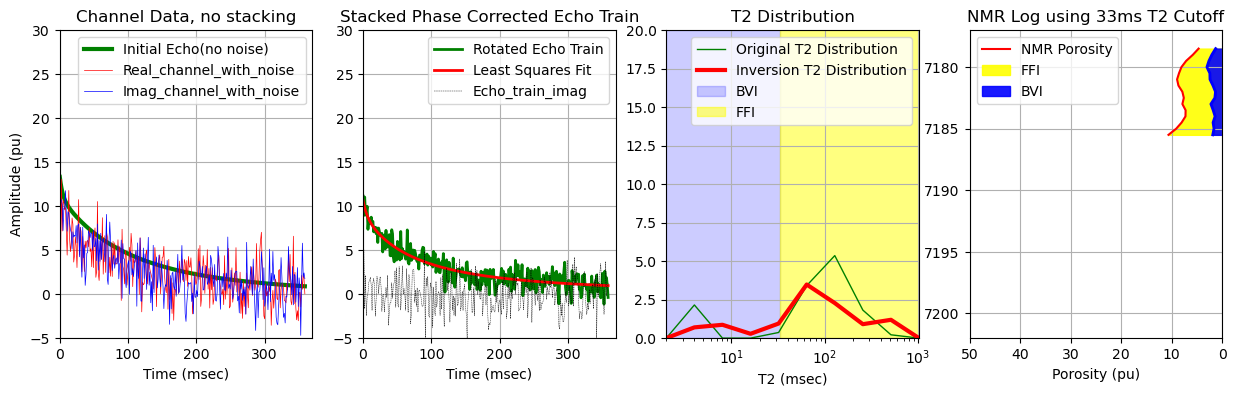

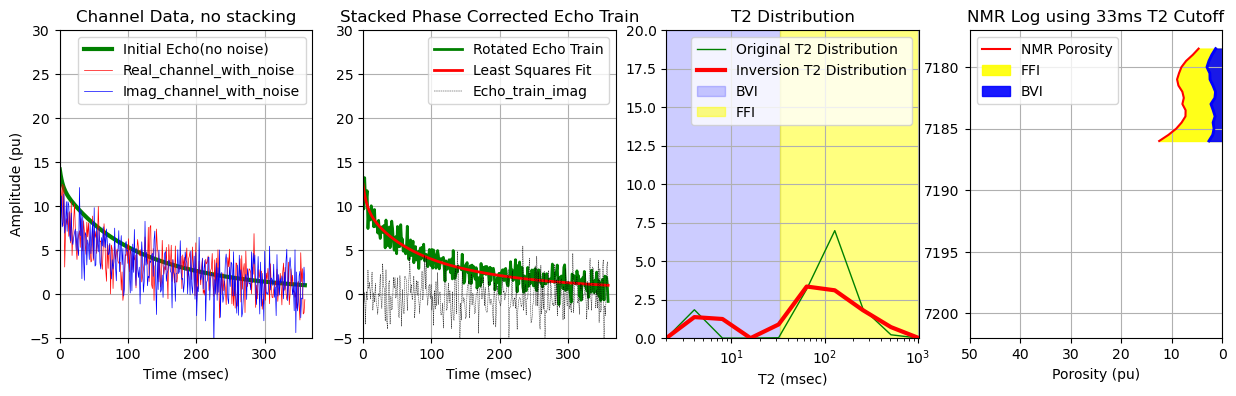

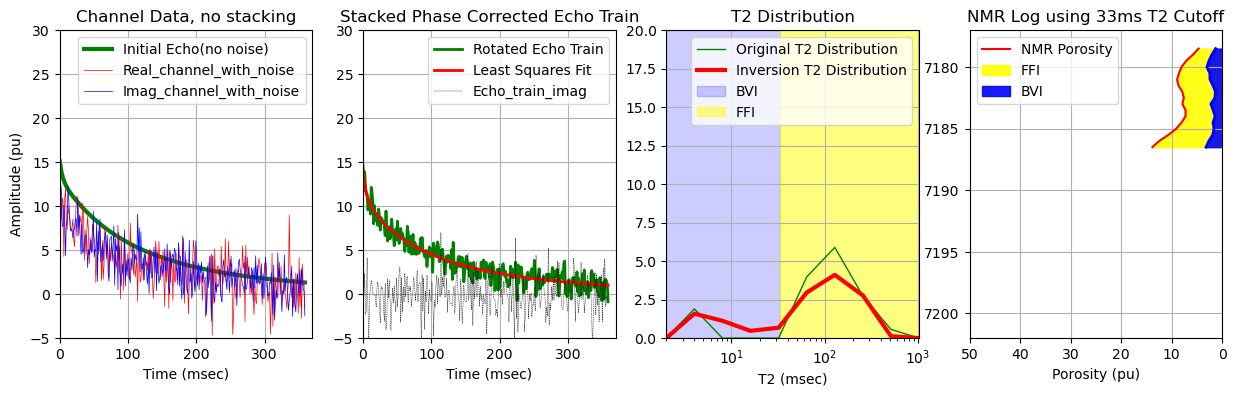

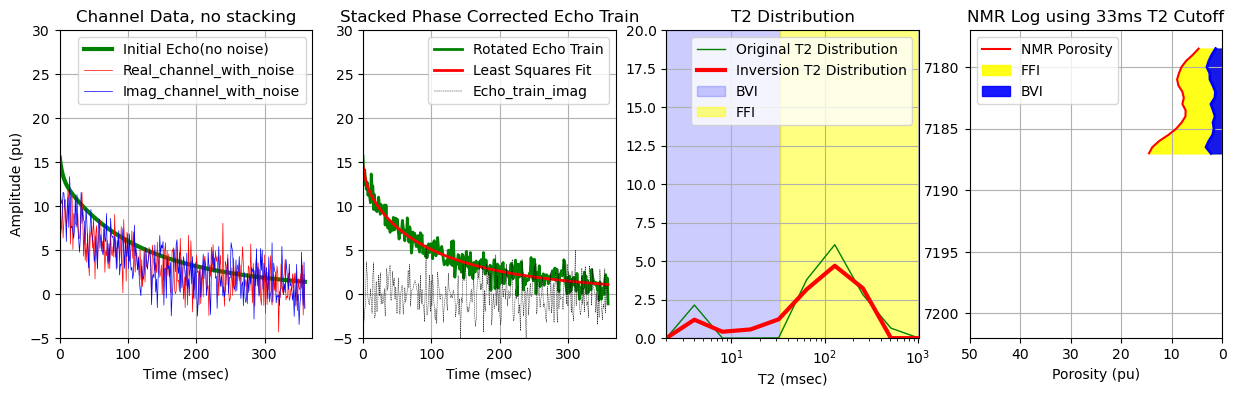

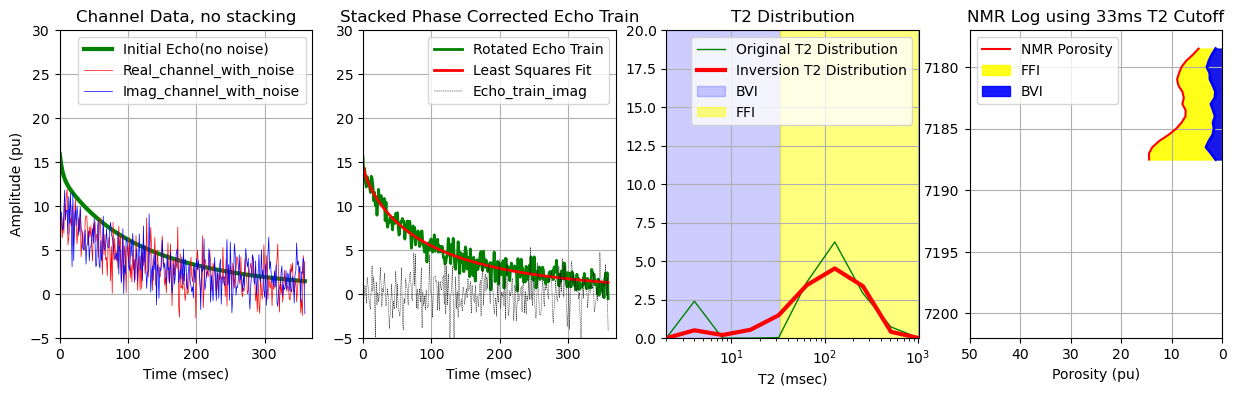

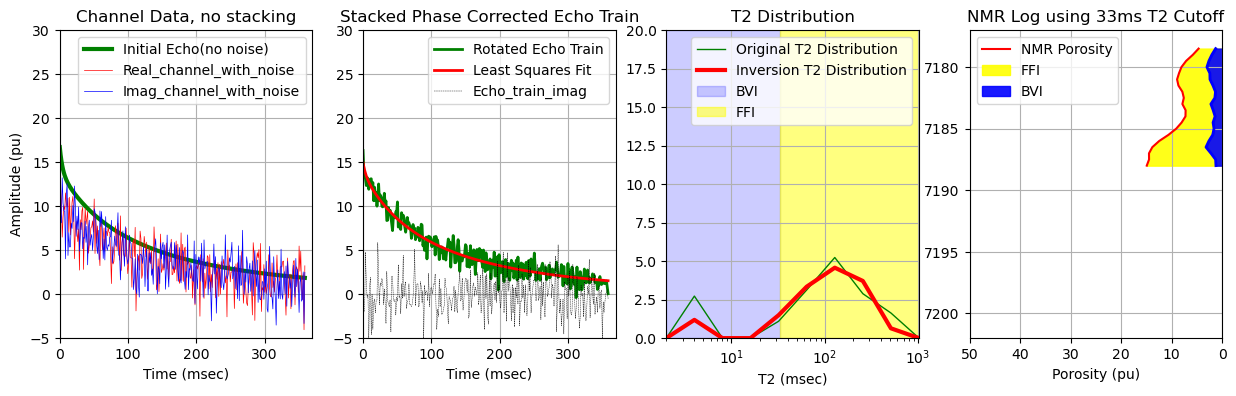

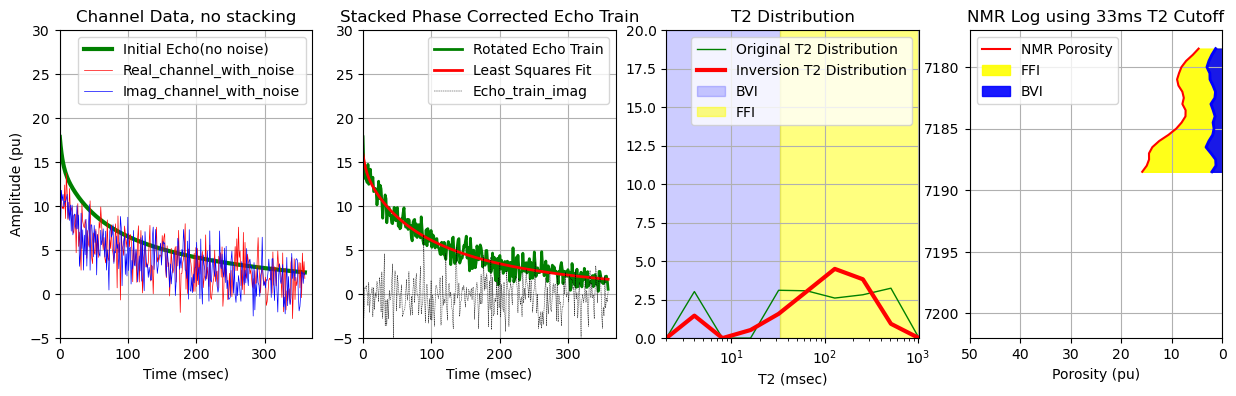

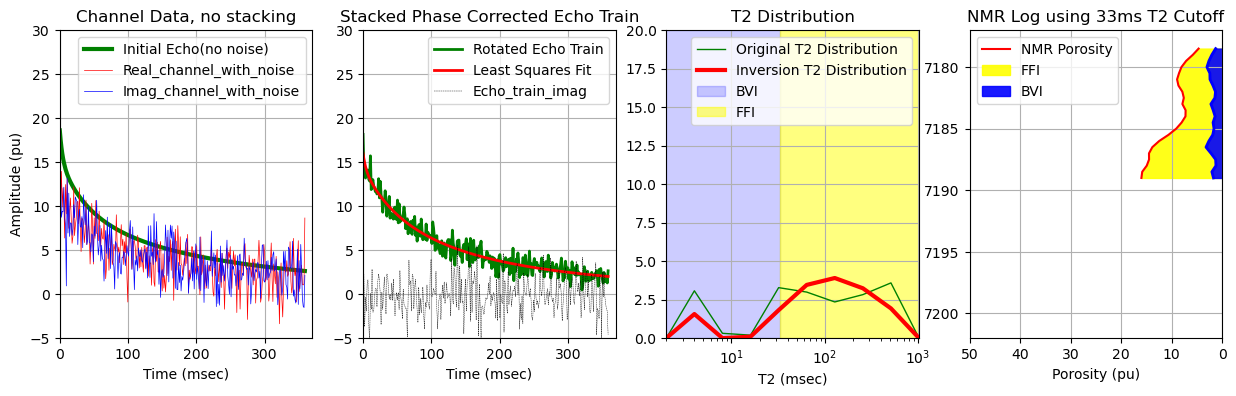

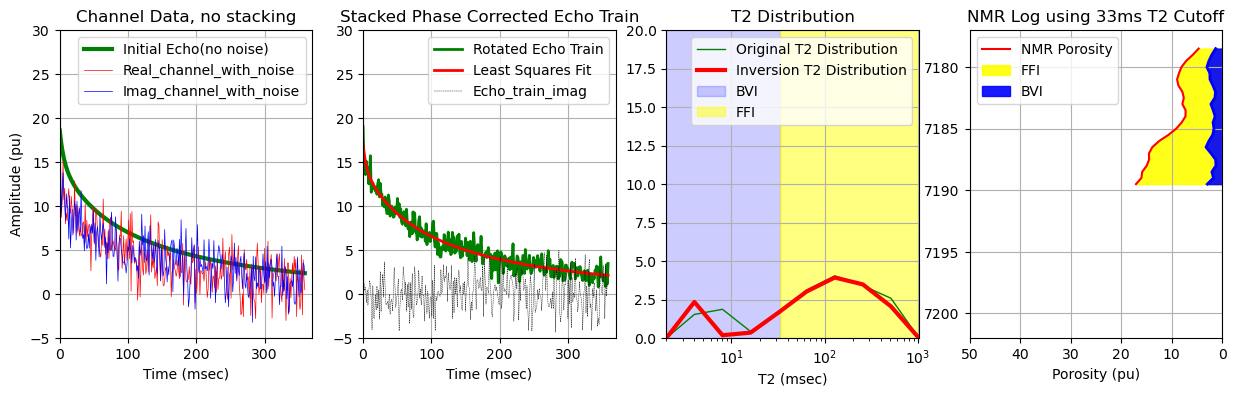

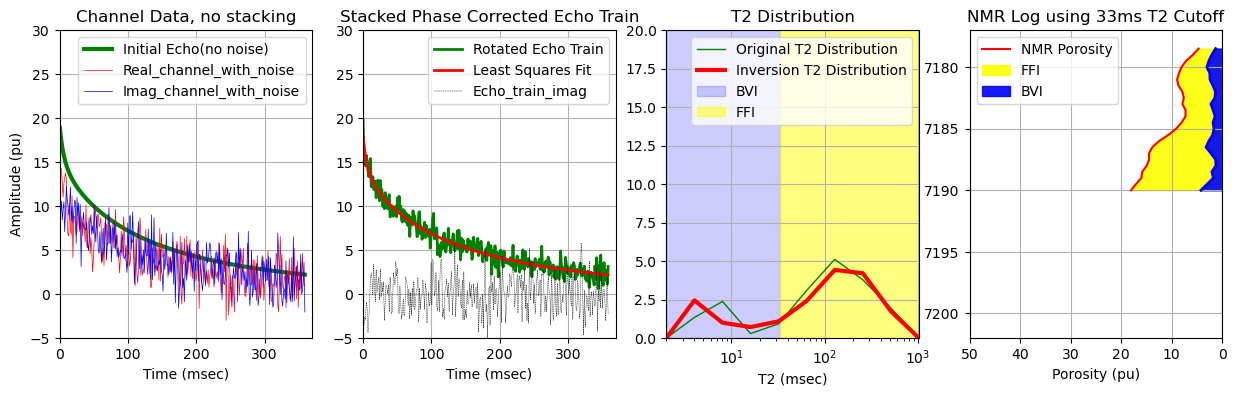

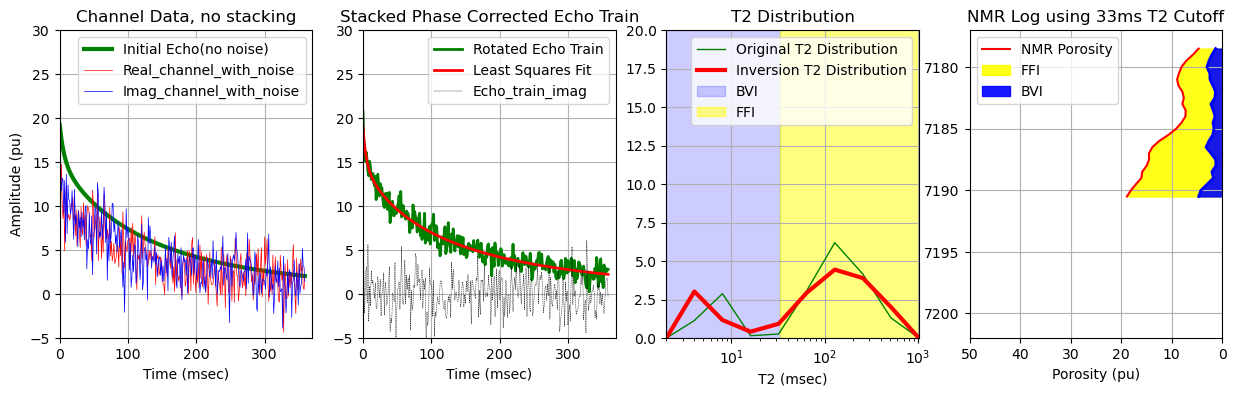

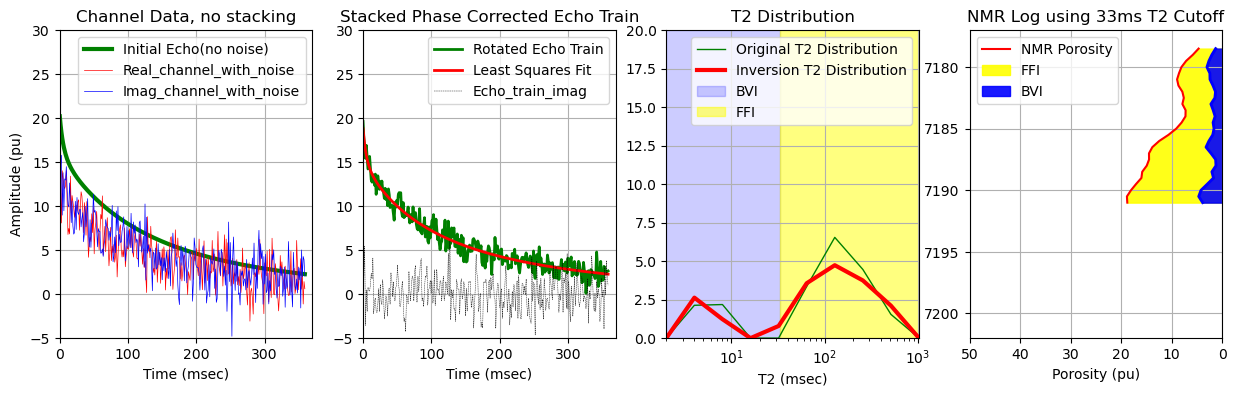

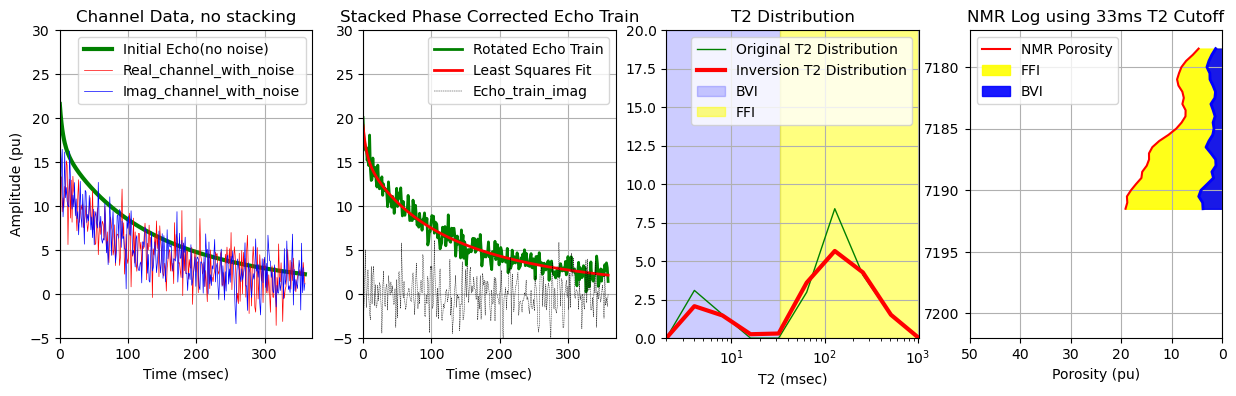

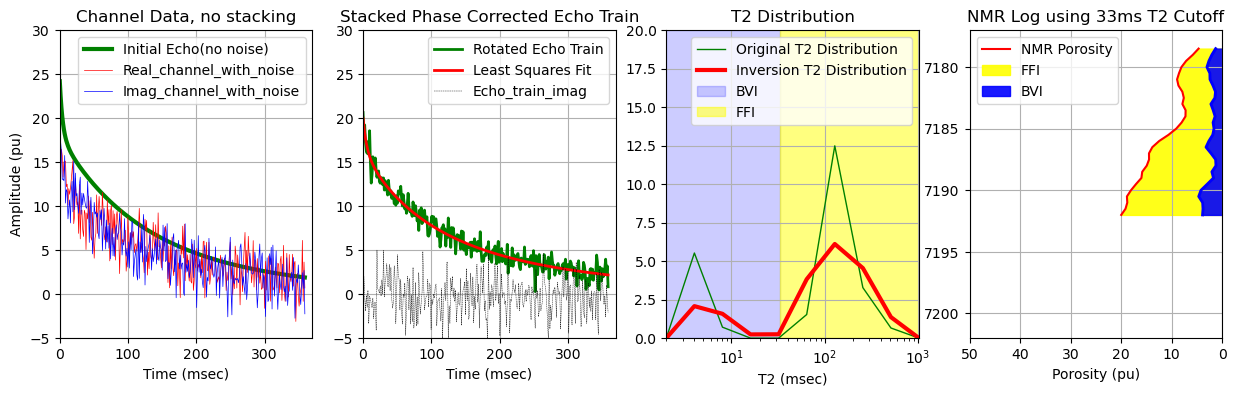

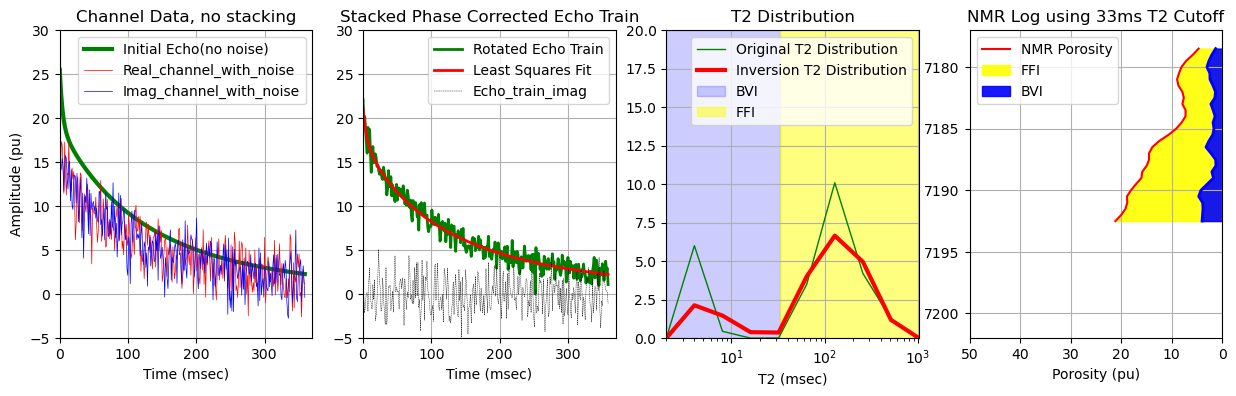

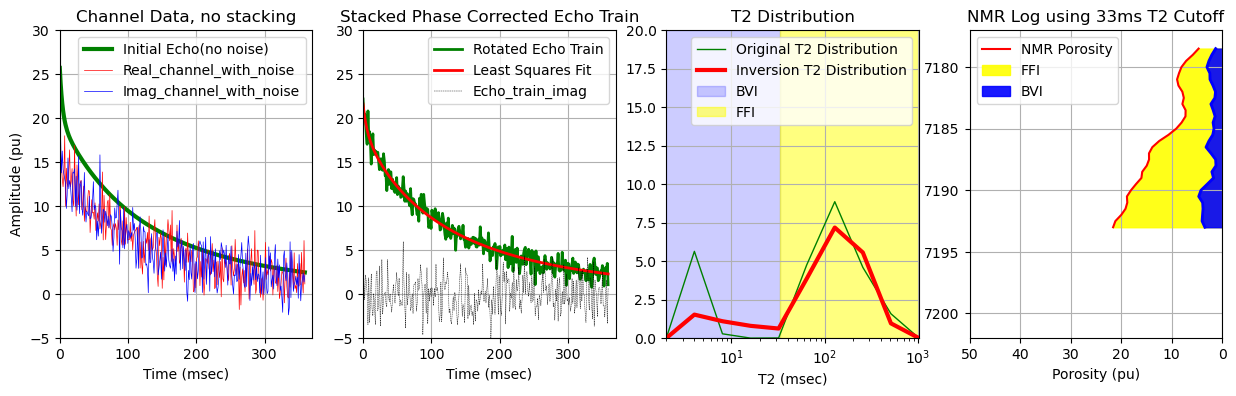

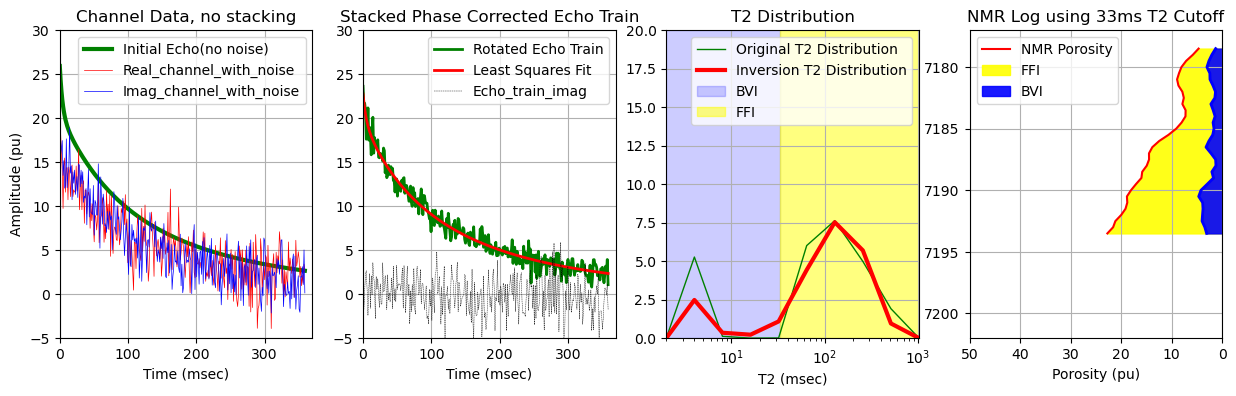

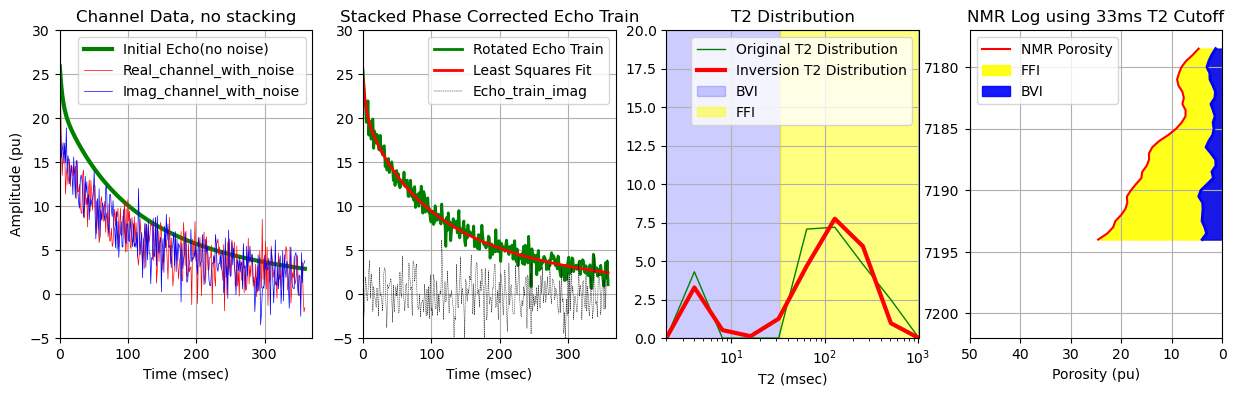

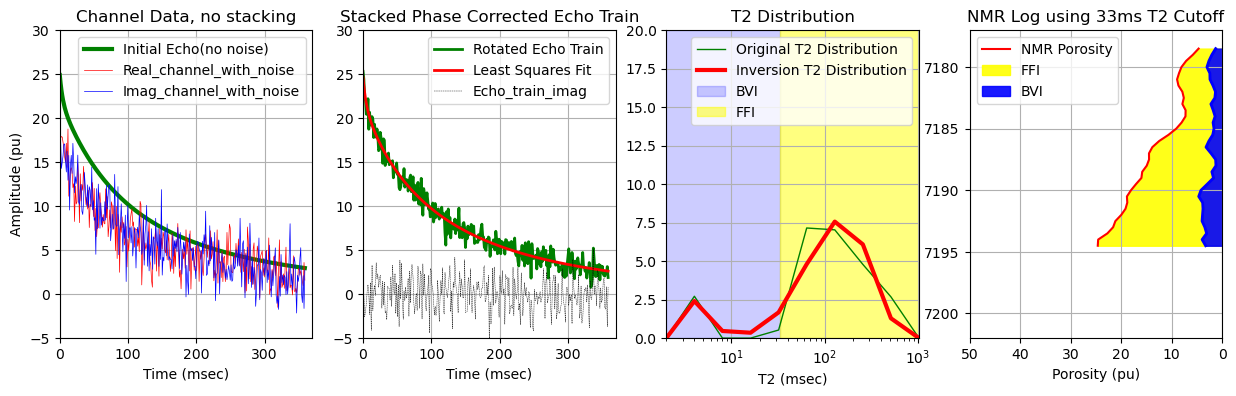

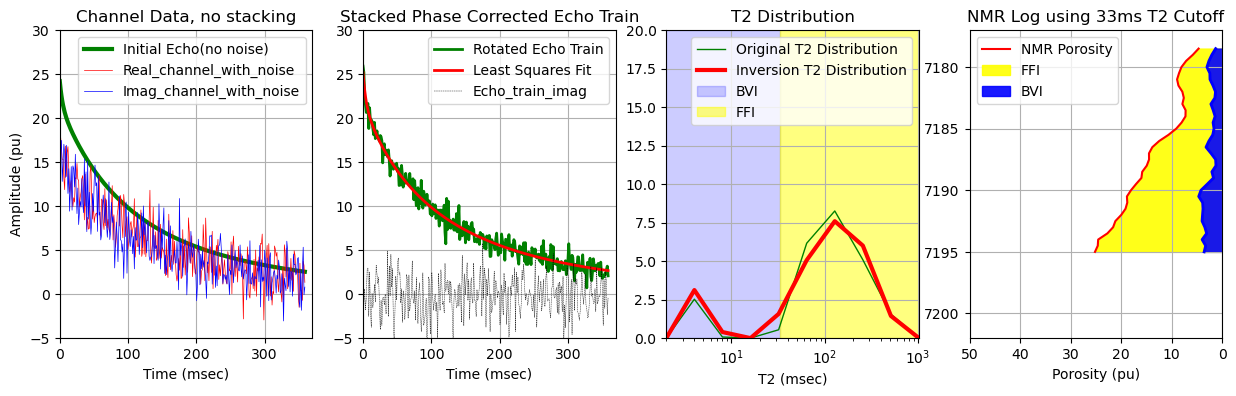

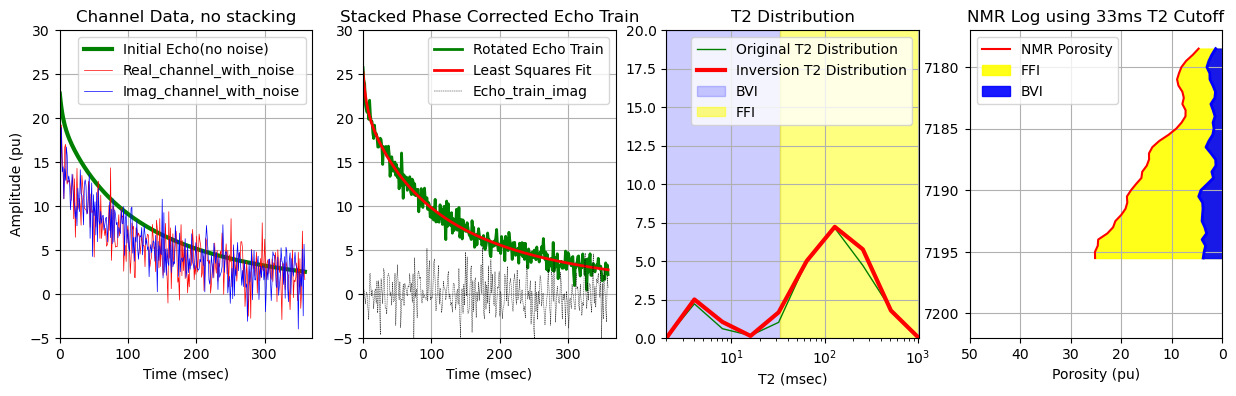

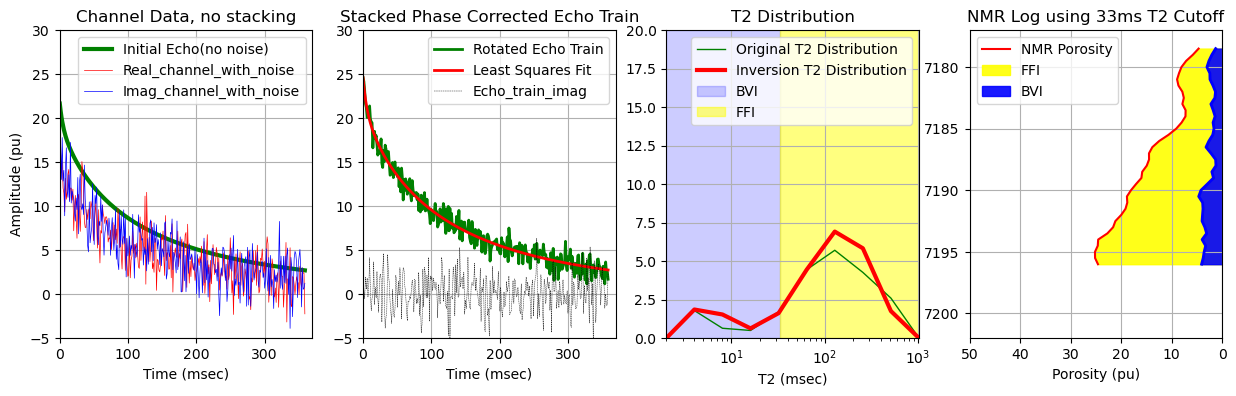

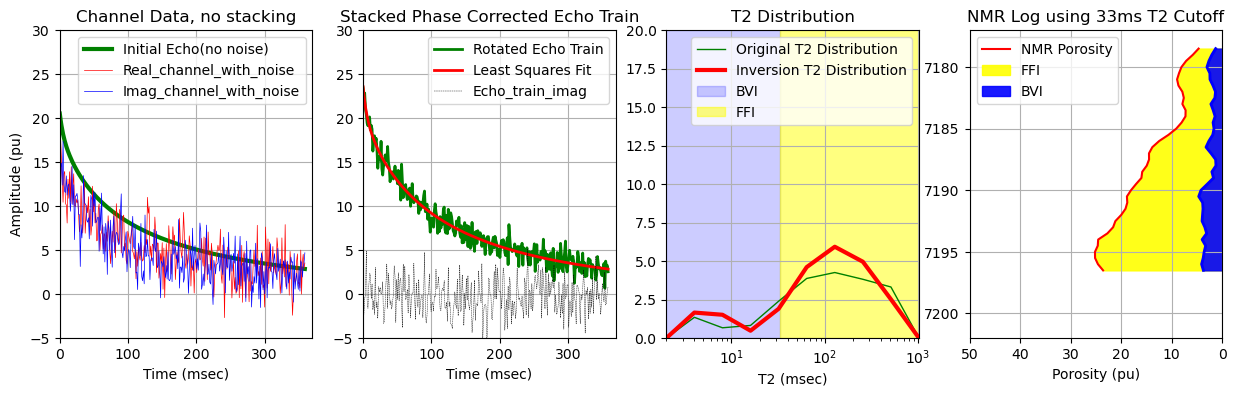

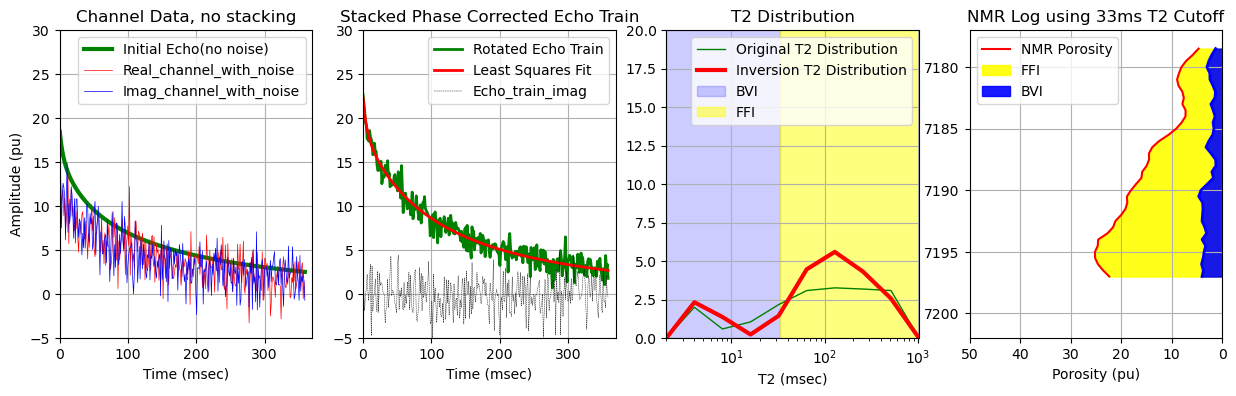

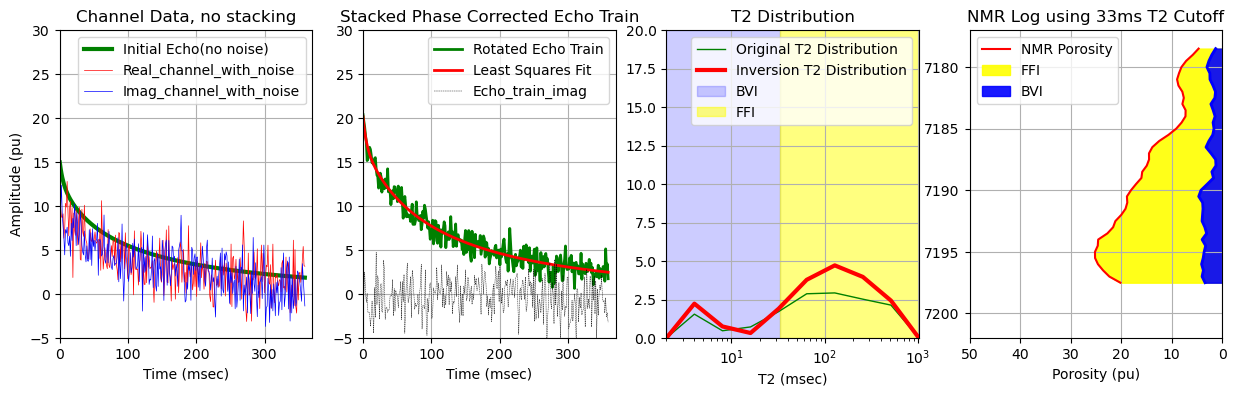

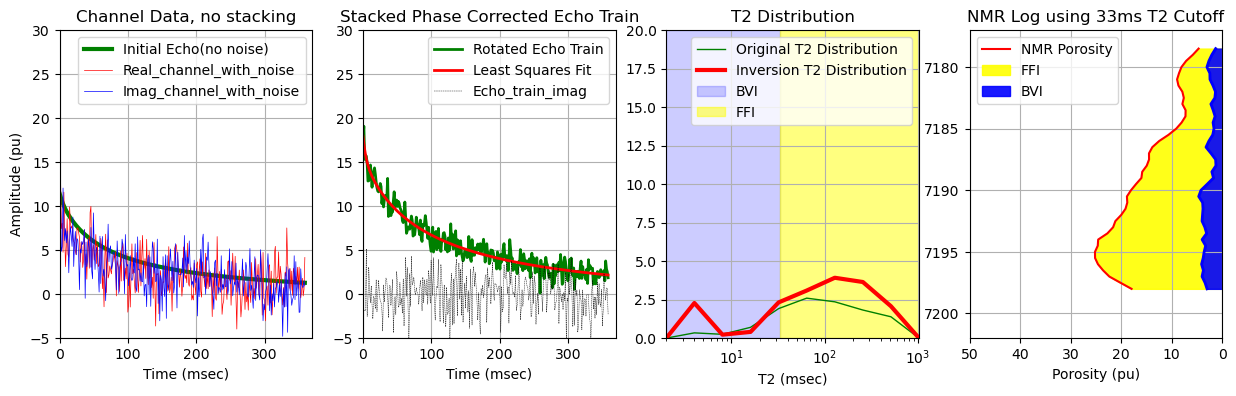

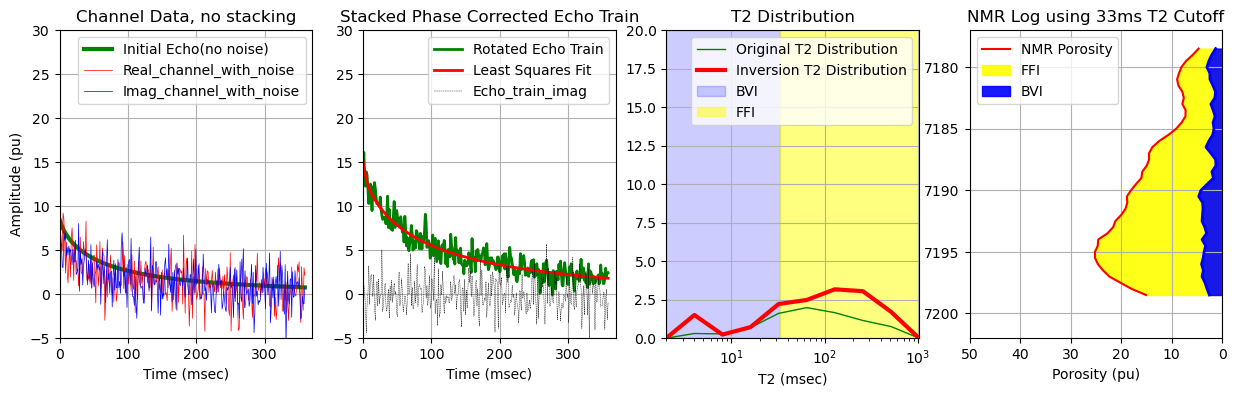

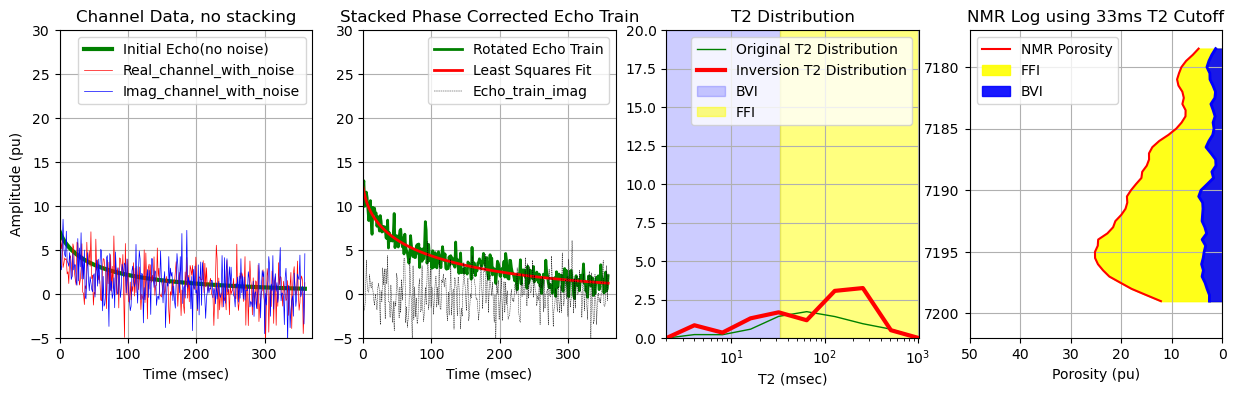

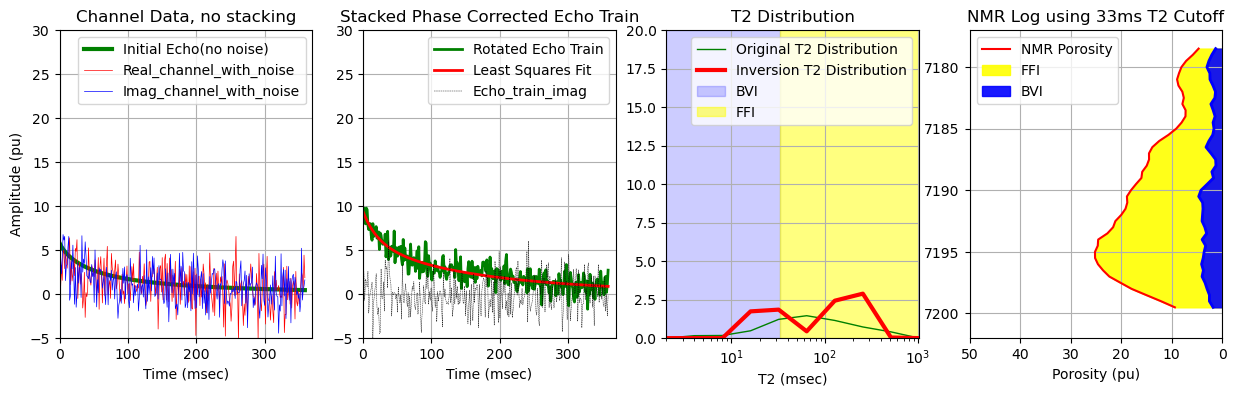

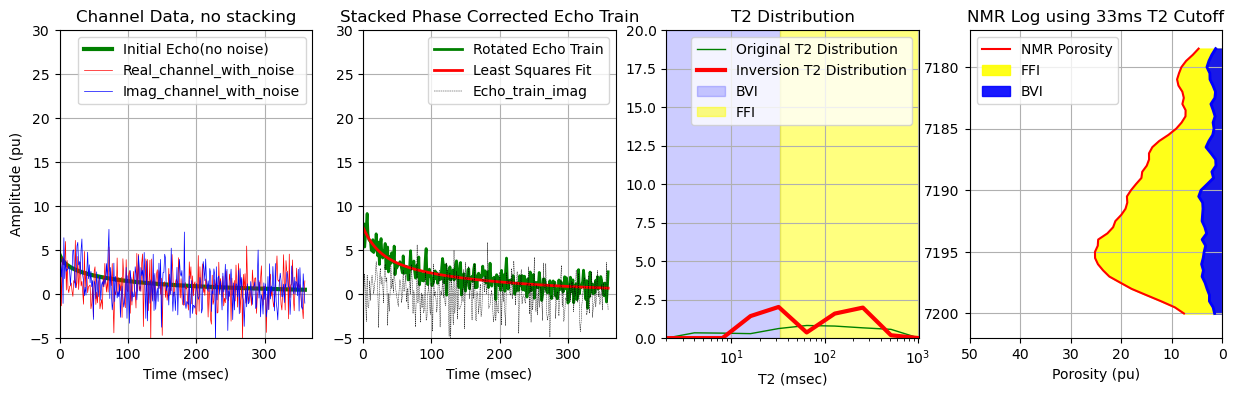

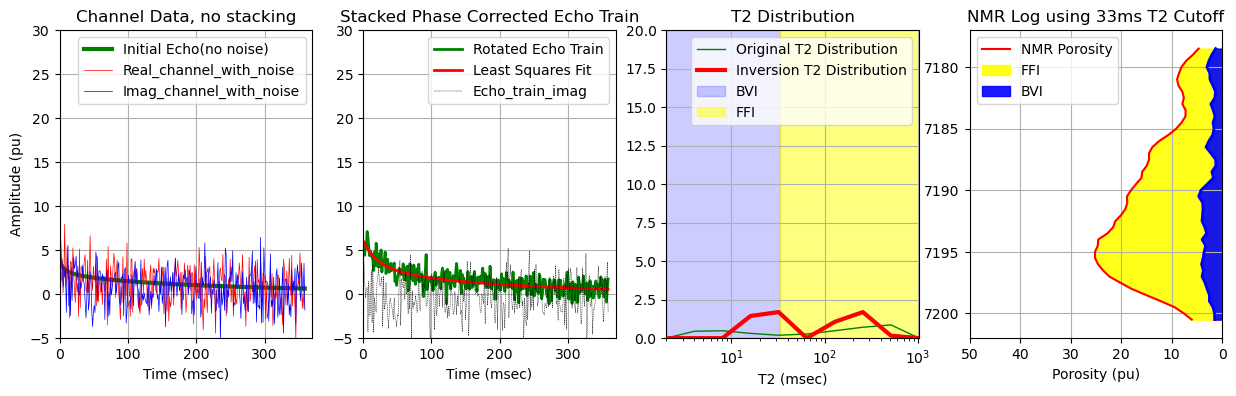

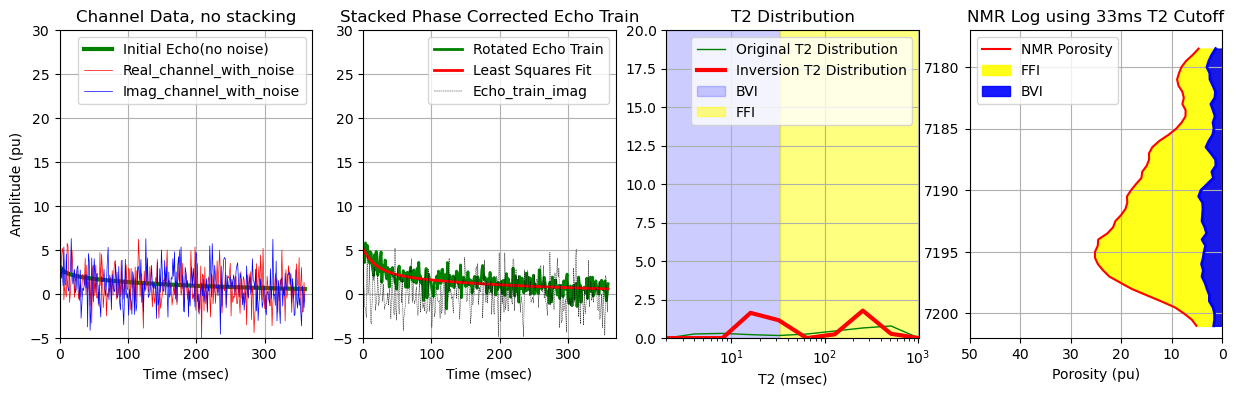

In [8]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

T2 =[2,4,8,16,32,64,128,256,512,1024,2048]

def func(x, p1, p2, p3, p4, p5, p6, p7, p8):
    return (p1 * np.exp(-x / 4) +
            p2 * np.exp(-x / 8) +
            p3 * np.exp(-x / 16) +
            p4 * np.exp(-x / 32) +
            p5 * np.exp(-x / 64) +
            p6 * np.exp(-x / 128) +
            p7 * np.exp(-x / 256) +
            p8 * np.exp(-x / 512))


deptharray=[]
mphiarray=[]
mbviarray=[]
mffiarray=[]
echo=[]
ystack=[]
T21=[]
T22 = []
#ystack2=[]
#ystackecho=[]

for index, row in df.iterrows():
    P0=0
    P1=row['P1']
    P2=row['P2']
    P3=row['P3']
    P4=row['P4']
    P5=row['P5']
    P6=row['P6']
    P7=row['P7']
    P8=row['P8']
    P9=0
    P10=0
    mphi=row['MPHI']
    mbvi=row['MBVI']
    depth=row['Depth']
    bins=[P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]

    p1 = P1
    p2 = P2
    p3 = P3
    p4 = P4
    p5 = P5
    p6 = P6
    p7 = P7
    p8 = P8

    # Define the T2 times
    T2_times = np.array([4, 8, 16, 32, 64, 128, 256, 512])

    # create x array with 200 elements
    num_echoes = 300
    TE = 1.2  # echo spacing (ms)
    xdata = np.arange(num_echoes) * TE
    #xdata = x
    phase_angle = np.pi / 4  # Phase angle in radians


    '''
      Calculate Echo Train data using xdata and func for echo train equation
    '''
    y = func(xdata,P1, P2, P3,  P4, P5, P6,  P7,  P8)

    ydata_original = y

    '''
      add noise to the echo train data to create a typical echo train
    '''
    # Step 2: Create a noise train
    noise_train = np.random.normal(0, noise_level, size=num_echoes * 2)

    # Step 3: Rotate the signal to create real and imaginary components
    rotated_real = y * np.cos(phase_angle)
    rotated_imag = y * np.sin(phase_angle)

    # Step 4: Add noise to the real and imaginary channels
    real_channel_with_noise = rotated_real + noise_train[:num_echoes]
    imag_channel_with_noise = rotated_imag + noise_train[num_echoes:]

    # Step 5: Rotate the noisy channels back to isolate the original signal
    echo_train_real = (real_channel_with_noise * np.cos(phase_angle) +
                      imag_channel_with_noise * np.sin(phase_angle))
    echo_train_imag = (-real_channel_with_noise * np.sin(phase_angle) +
                       imag_channel_with_noise * np.cos(phase_angle))

    #print('mean of echo_train_imag:', round(np.mean(echo_train_imag),2))


    ydata = echo_train_real


    '''
      Store Echo Trains in np array
    '''
    echo.append(ydata)
    yecho = pd.DataFrame(echo)

    ''' This is stacking of echo trains for better S/N'''
    if index > stack_levels -1:
        if stack_levels == 1:
            ystack=ydata
        else:
            for k in range(1,stack_levels):

                if stack_levels == 2:
                    ystack = (echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 3:
                    ystack = (echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels ==4:
                    ystack = (echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 5:
                    ystack = (echo[index-4]+echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 6:
                    ystack = (echo[index-5]+echo[index-4]+echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 7:
                    ystack = (echo[index-6]+echo[index-5]+echo[index-4]+echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 8:
                    ystack = (echo[index-7]+echo[index-6]+echo[index-5]+echo[index-4]+echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels
                elif stack_levels == 9:
                    ystack = (echo[index-8]+echo[index-7]+echo[index-6]+echo[index-5]+echo[index-4]+echo[index-3]+echo[index-2]+echo[index-1]+echo[index])/stack_levels

                else:
                    print('Stack Levels out of bounds')

        '''
        -----------------------------------------------------------------------------------------------
          T2 inversion using SciPy with regularization or SciPy curve_fit options:
        -----------------------------------------------------------------------------------------------
        '''

        # Set the initial parameter values
        p0 = np.ones(8)

        # least_squares objective function to be minimized, including a regularization term
        def objective(p, x, y, alpha):
            y_pred = func(x, *p)
            error = y - y_pred
            return np.concatenate([error, np.sqrt(alpha) * p])

        # Optimize obj_fun to minimize on
        def obj_func(params, x, y, lambda_):
            p1, p2, p3, p4, p5, p6, p7, p8 = params
            residuals = y - func(x, p1, p2, p3, p4, p5, p6, p7, p8)
            regularization = lambda_ * (p1**2 + p2**2 + p3**2 + p4**2 + p5**2 + p6**2 + p7**2 + p8**2)
            return np.sum(residuals**2) + regularization



        if method == 'least_squares' :
            # Fit the data to the function with L2 regularization using scipy.optimize
            result = least_squares(objective, p0, args=(xdata, ystack, alpha), bounds=([0]*8, [20]*8))
            popt = result.x
        elif method == 'Optimize':
            #lambda_ = 0.1  #started with 0.1
            result = minimize(obj_func, p0, args=(xdata, ystack, lambda_), method='L-BFGS-B', bounds=[(0, 20)]*8)
            popt = result.x
        elif method == 'Curve_fit_simple' :
            popt, pcov = curve_fit(func, xdata, ystack, method='trf', bounds=(0.05, [20, 20, 20, 20, 20, 20, 20, 20]))



        ''' Calculate T2 Cutoff of 33ms '''
        # Calculate BFV and FFI fractions for the 30ms bin
        log_33  = np.log10(33)
        log_32  = np.log10(32)
        log_64  = np.log10(64)

        mbvi_fraction = (log_33 - log_32) / (log_64 - log_32)  # Log-based BFV fraction
        mffi_fraction = 1 - mbvi_fraction                  # Remaining portion for FFI

        ''' Calculate BVI, MFFI and MPHI '''
        mbviarray.append(popt[0]+popt[1]+popt[2]+ mbvi_fraction*popt[3])
        mffiarray.append(mffi_fraction*popt[3]+popt[4]+popt[5]+popt[6]+popt[7])


        mphiarray.append(popt[0]+popt[1]+popt[2]+popt[3]+popt[4]+popt[5]+popt[6]+popt[7])

        multiplier = (1 - level_spacing)/2
        deptharray.append(depth - (stack_levels-1)/2 + multiplier*(stack_levels-1))

        optbins  = [P0,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],P9,  P10]
        T2       = [2,  4,      8,     16,     32,     64,     128,    256,   512,   1024, 2048]
        #bins    = [P0, P1,    P2,     P3,     P4,     P5,      P6,     P7,    P8,    P9,   P10]








        #-------------------------------------------------------------------------------------------------
        #-------------------------------------------------------------------------------------------------
        #------     Plot Echo Train and create NMR log T2 Dist, MPHI and MBVI from T2 Inversion      -----
        #-------------------------------------------------------------------------------------------------
        #-------------------------------------------------------------------------------------------------
        for p in range(1):
            p=0

            fig, ax = plt.subplots(1,4,figsize=(15,4))
            updated_x = xdata
            updated_y = ystack
            updated_yfit = func(xdata, *popt)


            ax[0].plot(updated_x,ydata_original          ,c='green',linewidth=3.0  , label='Initial Echo(no noise)')
            ax[0].plot(updated_x,real_channel_with_noise ,c='red'  ,linewidth=0.5  , label='Real_channel_with_noise')
            ax[0].plot(updated_x,imag_channel_with_noise ,c='blue' ,linewidth=0.5  , label='Imag_channel_with_noise')
            ax[0].set_xlim(0,370)
            ax[0].set_ylim(-5,30)
            ax[0].set_ylabel('Amplitude (pu)')
            ax[0].set_xlabel('Time (msec)')
            ax[0].set_title('Channel Data, no stacking')
            ax[0].legend(loc='upper right')
            ax[0].grid()


            ax[1].plot(updated_x,updated_y      ,c='green',linewidth=2,  label='Rotated Echo Train')
            ax[1].plot(updated_x,updated_yfit   ,c='red'  ,linewidth=2,  label='Least Squares Fit')
            ax[1].plot(updated_x,echo_train_imag,'k--'    ,linewidth=0.3, label='Echo_train_imag')
            ax[1].set_xlim(0,370)
            ax[1].set_ylim(-5,30)
            #ax[1].set_ylabel('Amplitude (pu)')
            ax[1].set_xlabel('Time (msec)')
            ax[1].set_title('Stacked Phase Corrected Echo Train')
            ax[1].legend(loc='upper right')
            ax[1].grid()

            #ax.figure(2)
            ax[2].semilogx(T2,bins, c='green', linewidth=1, label = 'Original T2 Distribution')
            ax[2].semilogx(T2,optbins,c='red', linewidth=3, label = 'Inversion T2 Distribution')
            #ax[1].semilogx(33,0.0 ,'b*')
            ax[2].set_xlim(2,1024)
            ax[2].set_ylim(0,20)
            #ax[2].set_ylabel('Bin Porosity (pu)')
            ax[2].set_xlabel('T2 (msec)')
            ax[2].set_title('T2 Distribution')
            ax[2].axvspan(2,33,alpha=0.2,color='blue',label='BVI')
            ax[2].axvspan(33,1024,alpha=0.5,color='yellow',label='FFI')
            ax[2].legend()
            ax[2].grid()

            ax[3].plot(mphiarray,deptharray ,c='red',label='NMR Porosity')
            ax[3].plot(mbviarray,deptharray ,c='blue',linewidth=2)
            ax[3].set_xlim(50,0)
            ax[3].set_ylim(max(df['Depth']),min(df['Depth']))
            #ax[3].set_ylim(12.5,0)
            #ax[3].set_ylabel('Depth)')
            ax[3].set_xlabel('Porosity (pu)')
            ax[3].set_title('NMR Log using 33ms T2 Cutoff')
            ax[3].fill_betweenx(deptharray, mphiarray, 0,  color='yellow', alpha=0.9, label='FFI')
            ax[3].fill_betweenx(deptharray, mbviarray, 0,  color='blue'  , alpha=0.9, label='BVI')
            ax[3].legend(loc='upper left')
            ax[3].grid()

            plt.draw()
            updated_x = xdata
            updated_y = ystack
            updated_yfit = func(xdata, *popt)
            plt.pause(0.05)
            #fig.clear()
            plt.close(fig)
            #fig.clf()




## Calculated Phase Angle in degrees and radians from the Channel data similar to what you might do if you had Channel X and Channel Y from a typical MRIL job:

In [9]:
#find line of best fit
a, b = np.polyfit(echo_train_real, echo_train_imag, 1)

print('phase_angle used =', round(np.rad2deg(phase_angle),1),', phase_angle_rad used =',round(phase_angle,2))


phase_angle used = 45.0 , phase_angle_rad used = 0.79


# Write out new NMR T2 inversion results with Echo Train to Excel file:

In [10]:
file_out = pd.merge(df, yecho ,left_index=True,right_index=True)

file_out.to_excel('nmr_echos.xlsx', index = False)